In [1]:
import os


experiments_paths = {
    "TTF": os.environ["DATA"] + "/07_BBO/03_bbo_optim/post_paper/02.01_TTF/",
    "TTF + isomer": os.environ["DATA"] + "/07_BBO/03_bbo_optim/post_paper/02.02_TTF_isomer/",
    "TTF + isomer + SAScore < 5": os.environ["DATA"] + "/07_BBO/03_bbo_optim/post_paper/02.03_TTF_isomer_sigm_lin/",
    "TTF + sillywalks filter": os.environ["DATA"] + "/07_BBO/03_bbo_optim/post_paper/02.04_TTF_sillywalks_CHEMBL_0/", # Note : failed at 4500/5000 steps for external reasons but not relaunched as almost over
    "TTF 6-31G(2df,p)": os.environ["DATA"] + "/07_BBO/03_bbo_optim/post_paper/04.01_TTF_631G2dfp/",
    "TTF 6-31G(2df,p) + sillywalks": os.environ["DATA"] + "/07_BBO/03_bbo_optim/post_paper/04.04_TTF_631G2dfp_sillywalks_0/"
}

evomol_experiments_paths = {
    "TTF EvoMol": os.environ["DATA"] + "/07_BBO/03_bbo_optim/post_paper/03.01_TTF_EvoMol/",
    "TTF EvoMol + sillywalks filter": os.environ["DATA"] + "/07_BBO/03_bbo_optim/post_paper/03.04_TTF_EvoMol_sillywalks_ChEMBL_0/",
    "TTF EvoMol 6-31G(2df,p)": os.environ["DATA"] + "/07_BBO/03_bbo_optim/post_paper/05.01_TTF_EvoMol_631G2dfp/",
    "TTF EvoMol 6-31G(2df,p) + sillywalks": os.environ["DATA"] + "/07_BBO/03_bbo_optim/post_paper/05.04_TTF_EvoMol_631G2dfp_sillywalks_0/"
}

In [2]:
import csv

# Adding the X̅(Gaussian(homo); Gaussian(lumo); Gaussian(homo-1)) column in TTF experiment
# It is missing due to change of BBOMol code between experiments

def add_mean_homo_lumo_homom1_column(dataset_path):
    
    score_col_idx = None
    column_already_added = False
    
    input_rows = []
    score_values = []
    with open(dataset_path, "r") as f:
        reader = csv.reader(f)
        
        for i, row in enumerate(reader):
            
            input_rows.append(row)
            if i == 0:
                for j in range(len(row)):
                    if row[j] == "obj_value":
                        score_col_idx = j
                        
                column_already_added = "X̅(Gaussian(homo); Gaussian(lumo); Gaussian(homo-1))" in row
            else:
                score_values.append(float(row[score_col_idx]))
                
    new_column = ["X̅(Gaussian(homo); Gaussian(lumo); Gaussian(homo-1))"] + score_values
        
    if not column_already_added:
        
        with open(dataset_path, "w") as f:
            writer = csv.writer(f)
            
            for i, row in enumerate(input_rows):
                writer.writerow(input_rows[i] + [new_column[i]])

add_mean_homo_lumo_homom1_column(experiments_paths["TTF"] + str(1) + "/dataset.csv")

In [3]:
from bbomol.postprocessing.postprocessing import load_complete_input_results
results_dict = load_complete_input_results(experiments_paths, evomol_experiments_paths, 
                                           sub_experiment_names=["1"])
results_dict_with_init_step = load_complete_input_results(experiments_paths, evomol_experiments_paths,
                                                          sub_experiment_names=["1"],
                                                          include_dataset_init_step=True)

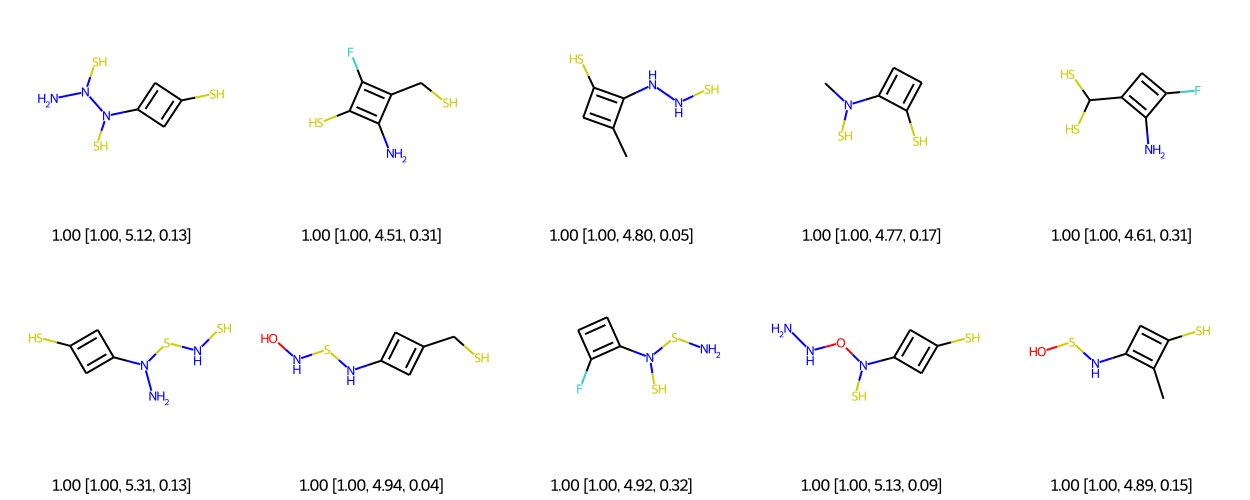

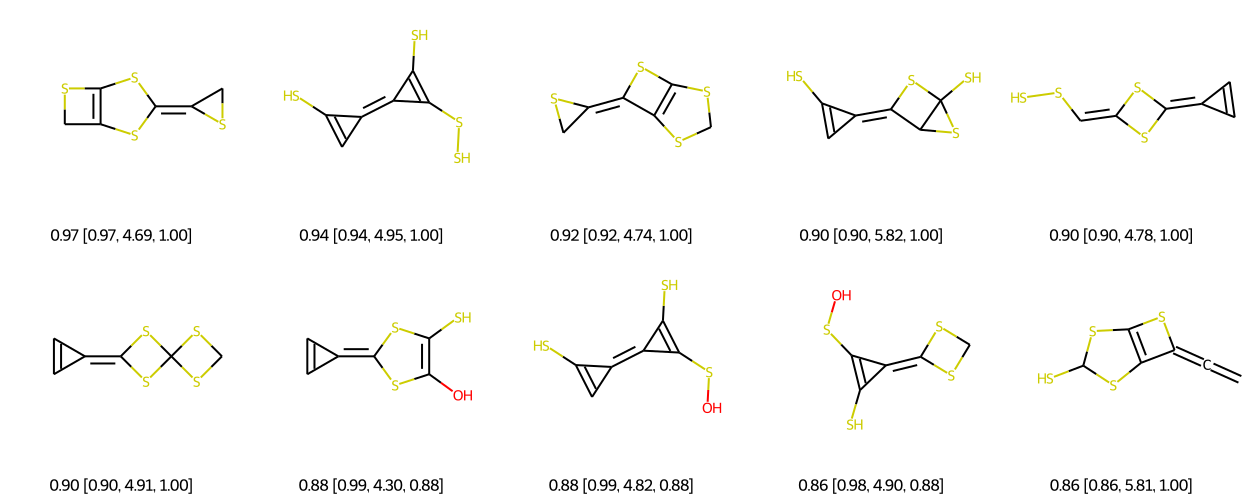

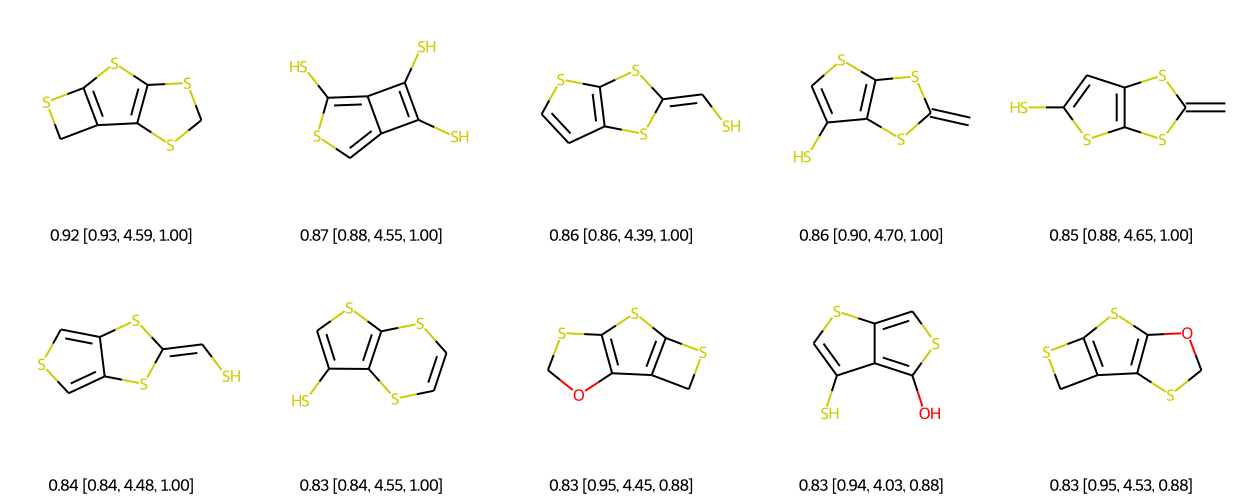

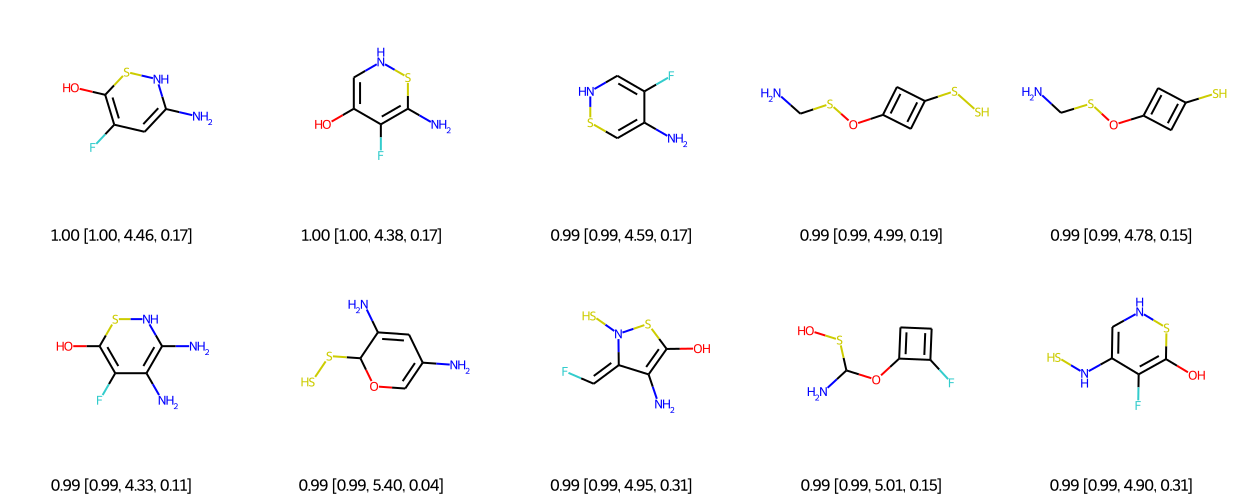

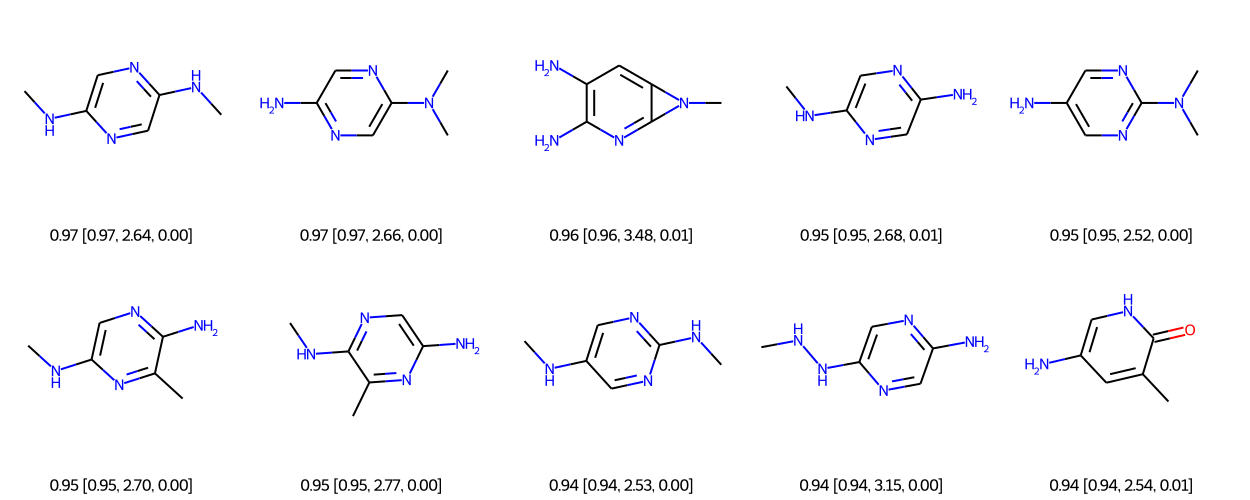

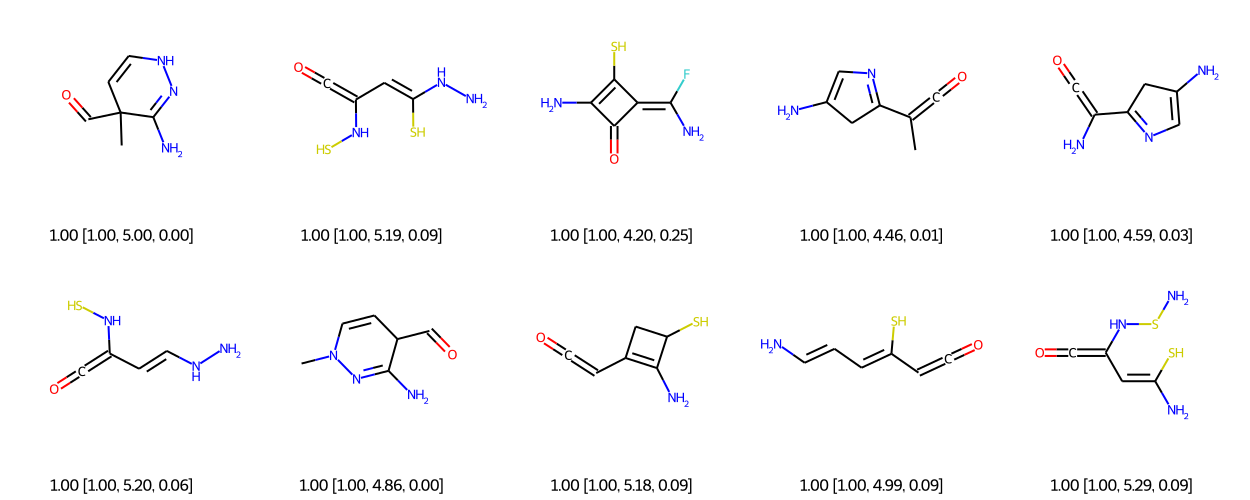

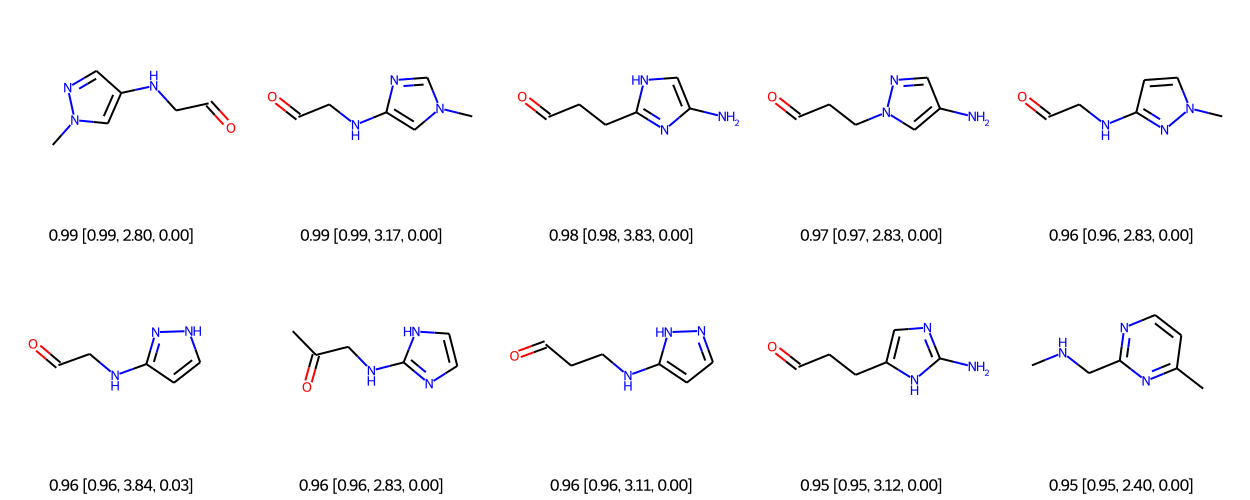

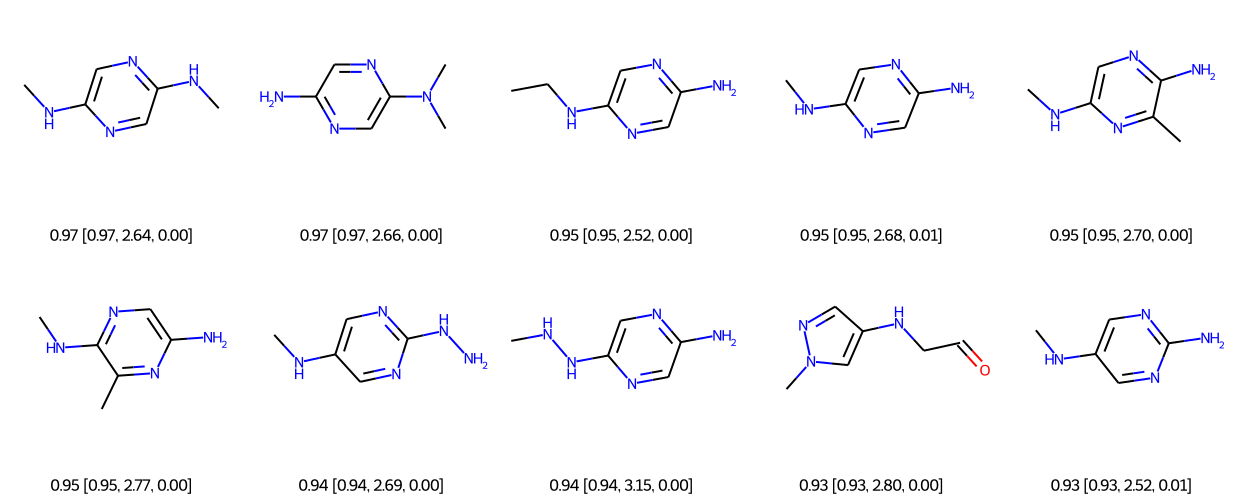

In [4]:
from bbomol.postprocessing.plot import draw_best_solutions
from evomol.evaluation import SAScoreEvaluationStrategy, IsomerGuacaMolEvaluationStrategy
from IPython.display import display, HTML

labels_dict = {
    "TTF": "objective : Electronic similarity",
    "TTF + isomer": "objective : Electronic similarity * isomer",
    "TTF + isomer + SAScore < 5": "objective : Electronic similarity * isomer * SAScore < 5",
    "TTF 6-31G(2df,p)": "Electronic similarity 6-31G(2df,p)",
    "TTF 6-31G(2df,p) + sillywalks": "Electronic similarity 6-31G(2df,p) (sillywalks filter)",
    "TTF + sillywalks filter": "objective : Electronic similarity (sillywalks filter)",
    "TTF EvoMol": "objective : Electronic similarity (EvoMol)",
    "TTF EvoMol + sillywalks filter": "Electronic similarity (EvoMol) + sillywalks filter",
    "TTF EvoMol 6-31G(2df,p)": "Electronic similarity 6-31G(2df,p) (EvoMol)",
    "TTF EvoMol 6-31G(2df,p) + sillywalks": "Electronic similarity 6-31G(2df,p) (EvoMol) + sillywaks filter"
    
}


properties = ["obj_value", "X̅(Gaussian(homo); Gaussian(lumo); Gaussian(homo-1))",
              SAScoreEvaluationStrategy(), IsomerGuacaMolEvaluationStrategy("C6H4S4")]



display(HTML("<h1> Scores : obj. value [electronic similarity, SAScore, Isomer] </h1>"))
displayed_molecules_dict = draw_best_solutions(results_dict, properties=properties, size=250, n_mol_per_run=10, labels_dict=labels_dict)



In [5]:
# from evomol.evaluation_dft import OPTEvaluationStrategy, smi_to_filename
# from os.path import join, abspath, relpath
# dft_results_paths_dict = {}

# s = OPTEvaluationStrategy("homo", working_dir_path=abspath("./dft_calculations"), MM_program="rdkit")

# for exp_key, run_list in displayed_molecules_dict.items():
#     for smi in run_list[0]:
#         try:
#             s.eval_smi(smi)
#             dft_results_paths_dict[smi] = relpath(join(s.working_dir_path_uuid, smi_to_filename(smi) + "_OPT.log.gz"))
#         except Exception as e :
#             print()
#             print("Issue when evaluating " + smi)
            

In [6]:
for exp_key, run_list in displayed_molecules_dict.items():
    display(HTML("<h2>" + labels_dict[exp_key] + "</h2>"))
    for smi in run_list[0]:
        if smi in dft_results_paths_dict:
            display(HTML("<a href='" + dft_results_paths_dict[smi] + "'>" + smi + "</a>"))
        else:
            display(HTML(smi + " (error)"))

NameError: name 'dft_results_paths_dict' is not defined

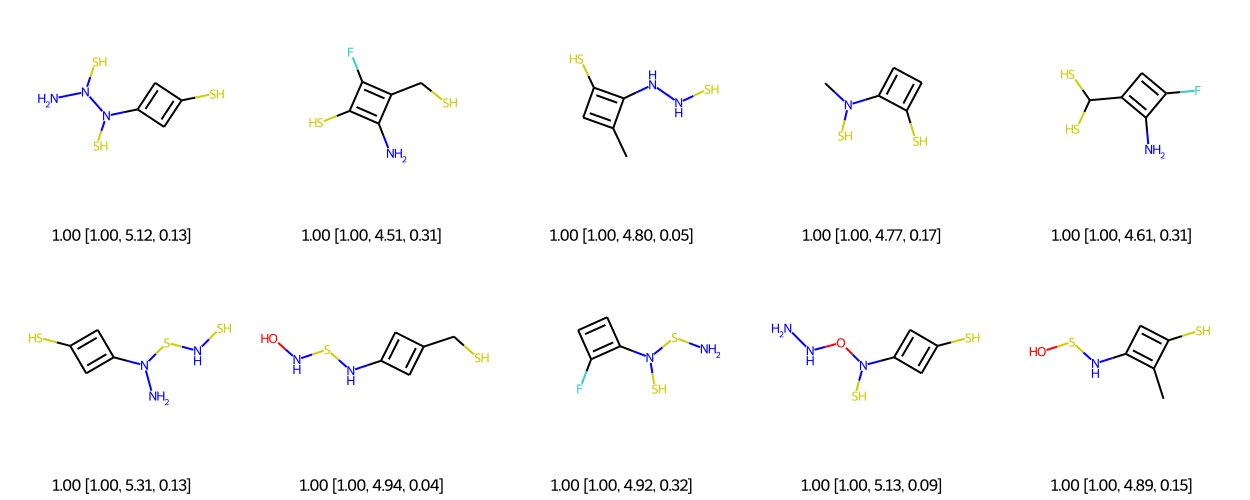

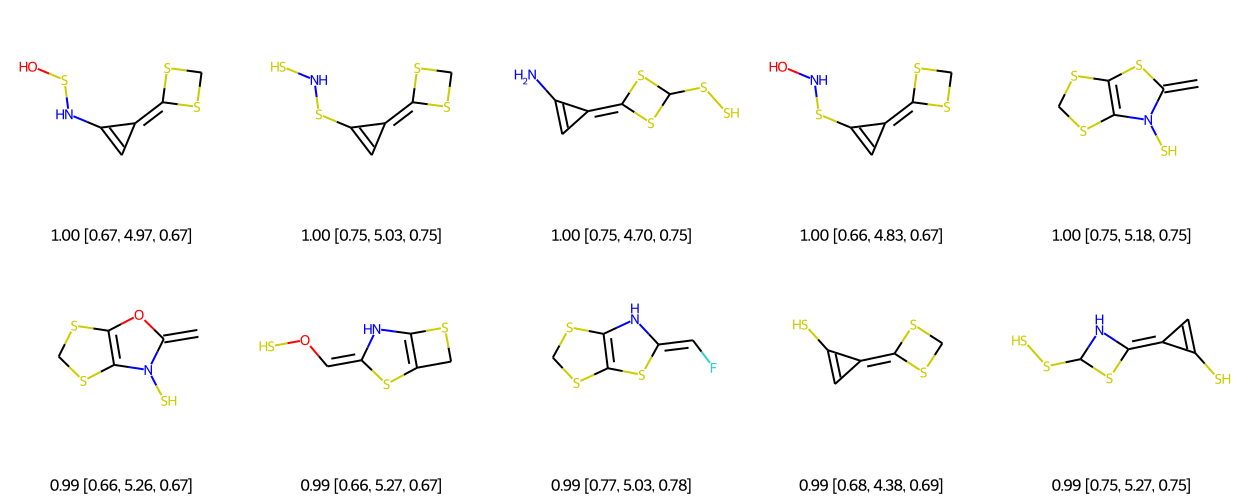

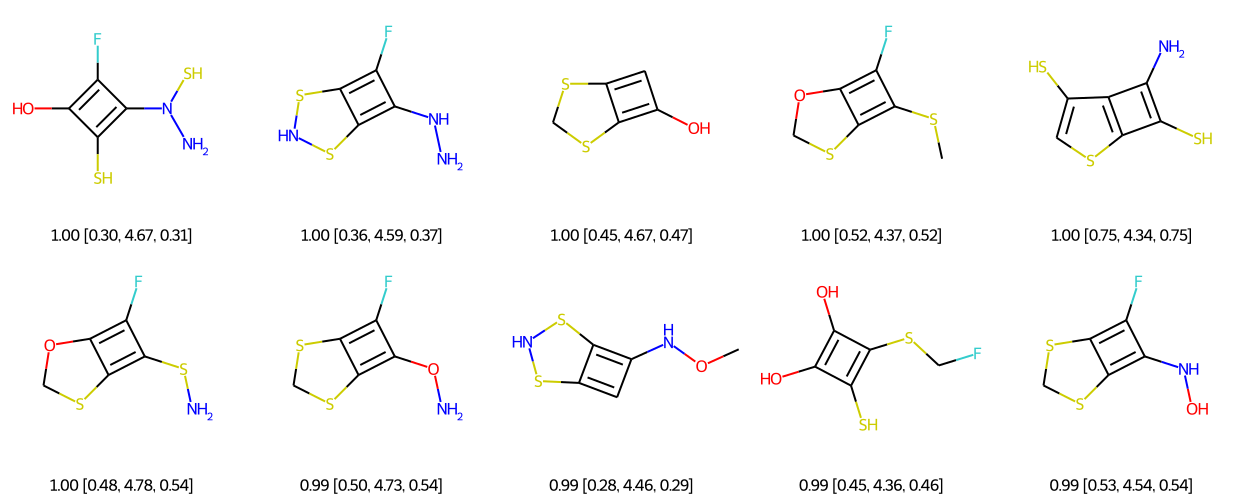

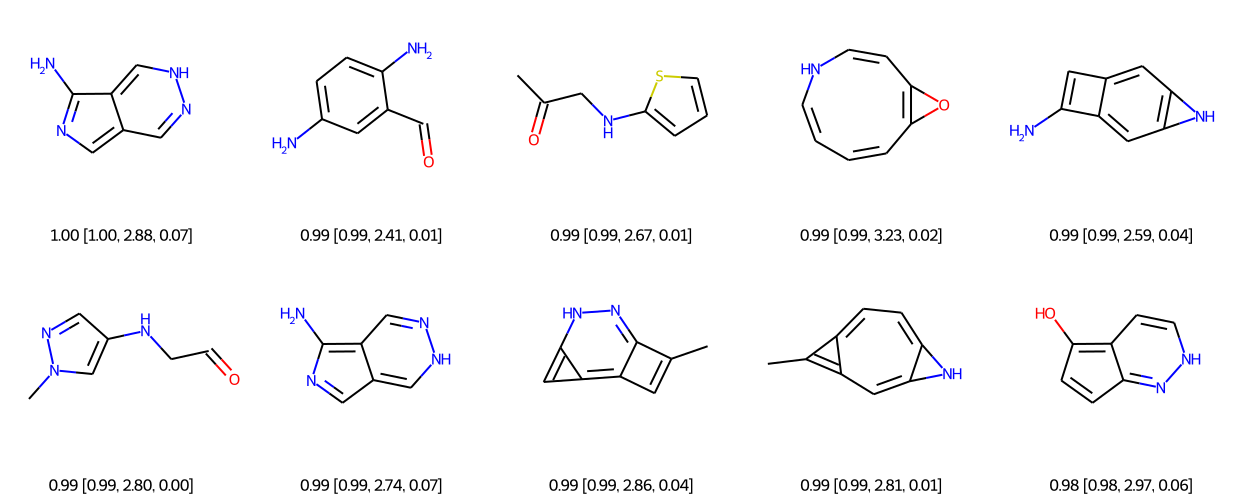

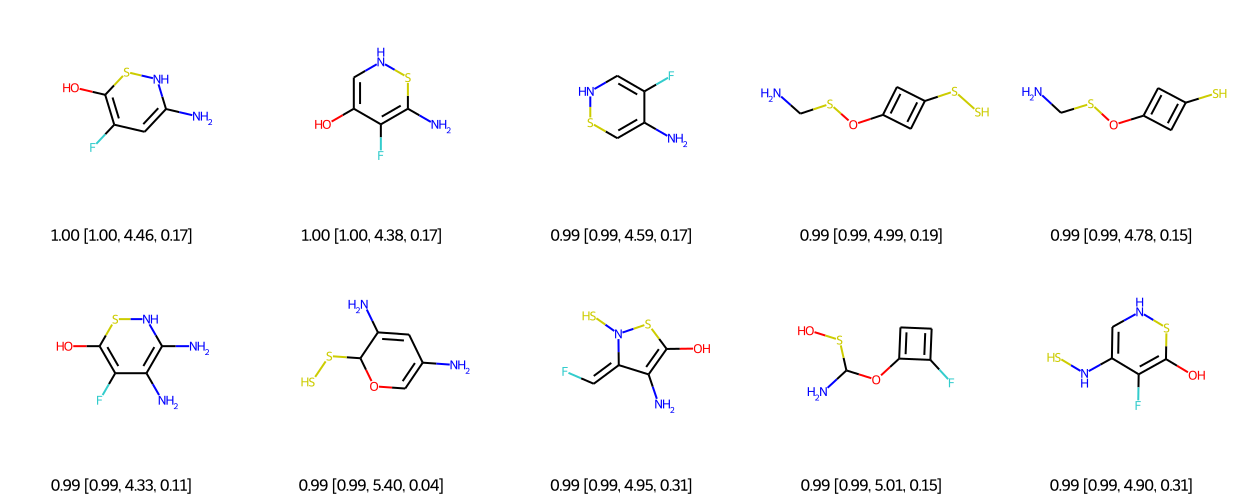

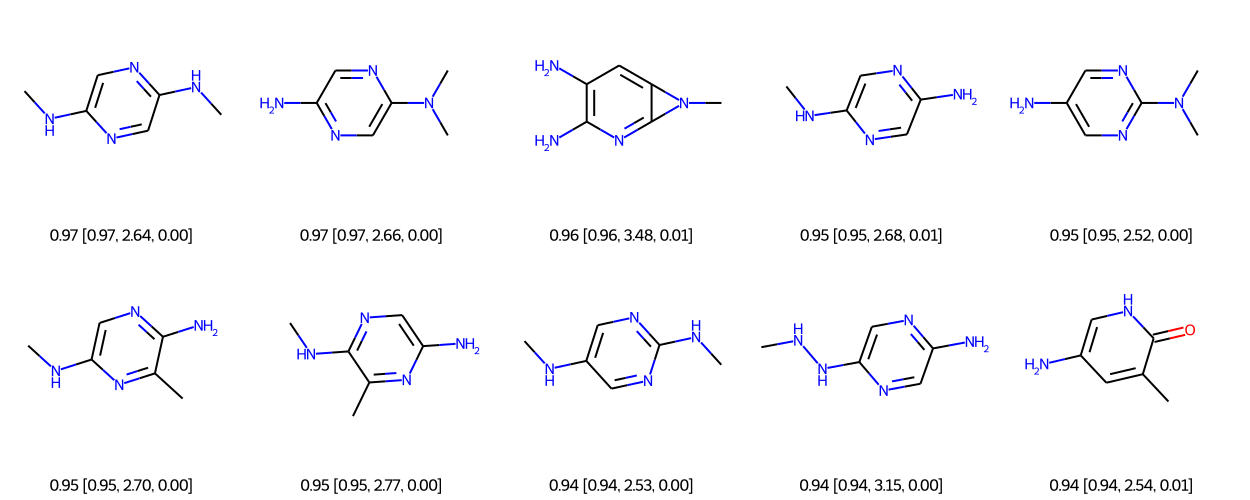

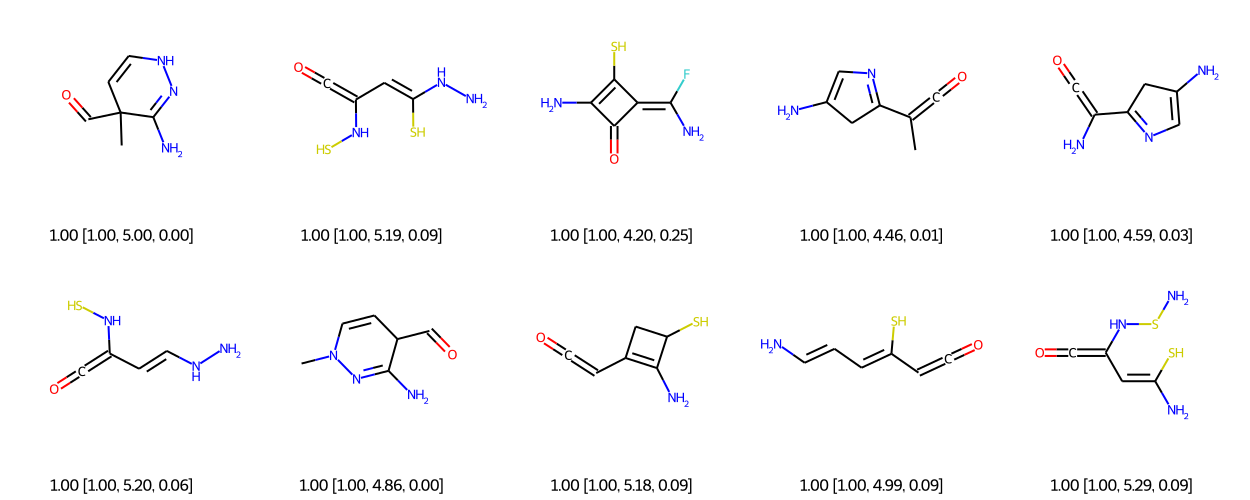

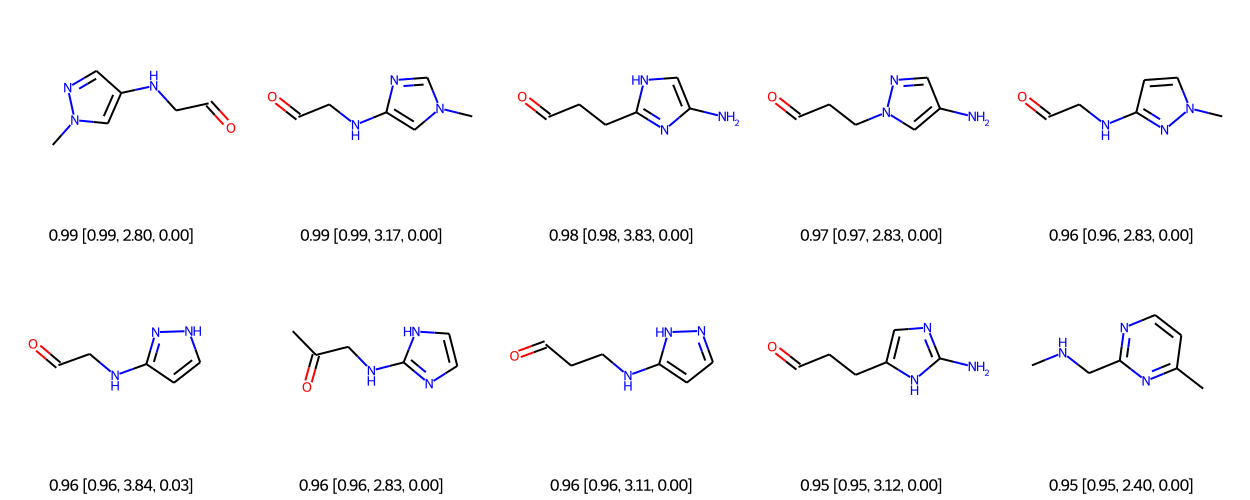

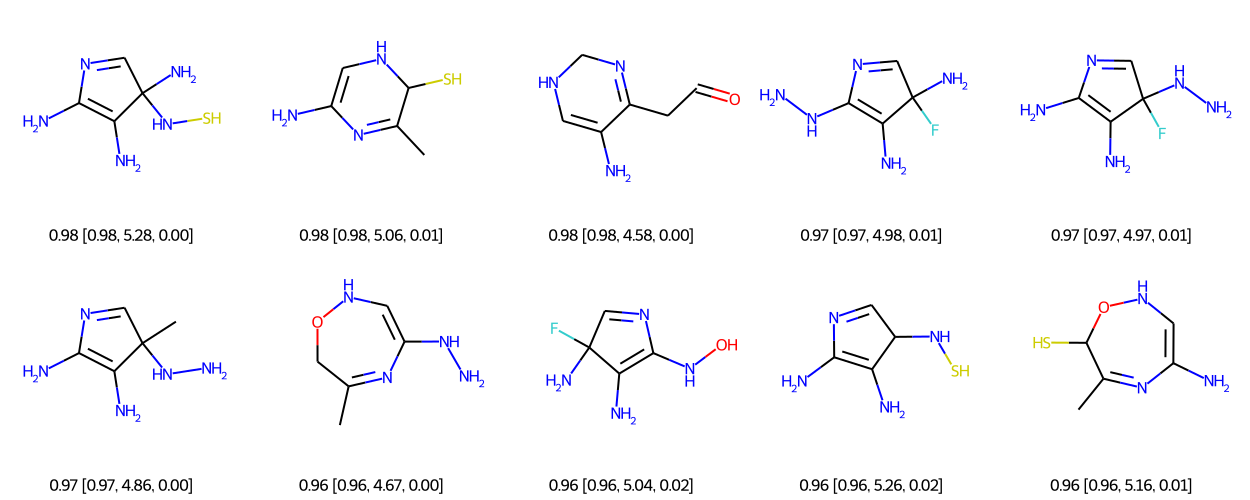

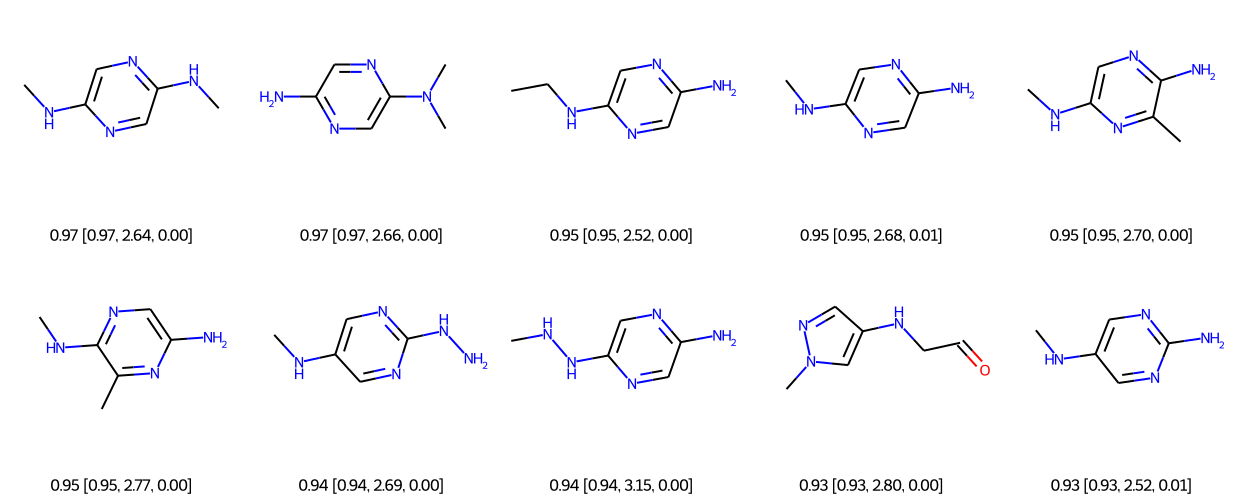

{'TTF': [array(['NN(S)N(S)C1=CC(S)=C1', 'NC1=C(S)C(F)=C1CS', 'CC1=CC(S)=C1NNS',
         'CN(S)C1=CC=C1S', 'NC1=C(C(S)S)C=C1F', 'NN(SNS)C1=CC(S)=C1',
         'ONSNC1=CC(CS)=C1', 'NSN(S)C1=C(F)C=C1', 'NNON(S)C1=CC(S)=C1',
         'CC1=C(NSO)C=C1S'], dtype='<U27')],
 'TTF + isomer': [array(['OSNC1=CC1=C1SCS1', 'SNSC1=CC1=C1SCS1', 'NC1=CC1=C1SC(SS)S1',
         'ONSC1=CC1=C1SCS1', 'C=C1SC2=C(SCS2)N1S', 'C=C1OC2=C(SCS2)N1S',
         'SOC=C1NC2=C(CS2)S1', 'FC=C1NC2=C(SCS2)S1', 'SC1=CC1=C1SCS1',
         'SSC1NC(=C2C=C2S)S1'], dtype='<U25')],
 'TTF + isomer + SAScore < 5': [array(['NN(S)C1=C(S)C(O)=C1F', 'NNc1c2s[nH]sc-2c1F', 'OC1=C2SCSC2=C1',
         'CSC1=C2SCOC2=C1F', 'NC1=C(S)c2scc(S)c21', 'NSC1=C2SCOC2=C1F',
         'NOC1=C2SCSC2=C1F', 'CONc1cc2s[nH]sc1-2', 'OC1=C(O)C(SCF)=C1S',
         'ONC1=C2SCSC2=C1F'], dtype='<U25')],
 'TTF + sillywalks filter': [array(['Nc1ncc2cn[nH]cc1-2', 'Nc1ccc(N)c(C=O)c1', 'CC(=O)CNc1cccs1',
         'c1ccc2c(cc[nH]c1)O2', 'Nc1cc2cc3[nH]c3cc12', 'Cn1cc(

In [7]:
display(HTML("<h1> Scores : electronic similarity [obj. value, SAScore, Isomer] </h1>"))

properties = ["X̅(Gaussian(homo); Gaussian(lumo); Gaussian(homo-1))", "obj_value",
              SAScoreEvaluationStrategy(), IsomerGuacaMolEvaluationStrategy("C6H4S4")]

draw_best_solutions(results_dict, properties=properties, size=250, n_mol_per_run=10, labels_dict=labels_dict)


### Objective value distribution

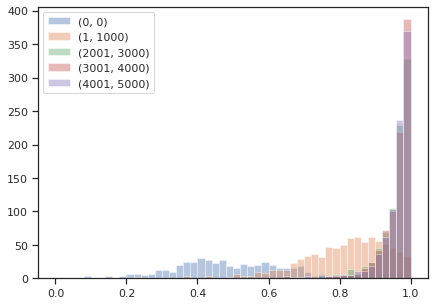

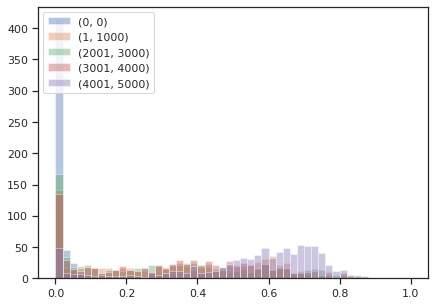

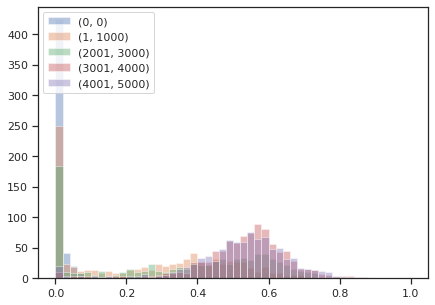

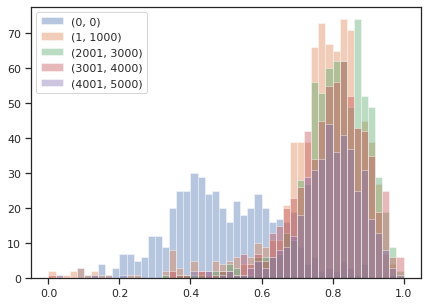

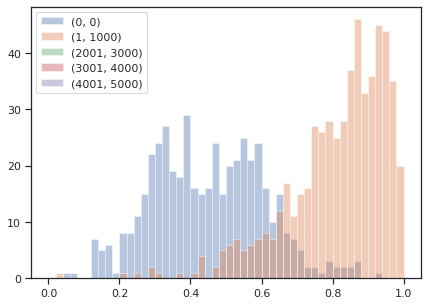

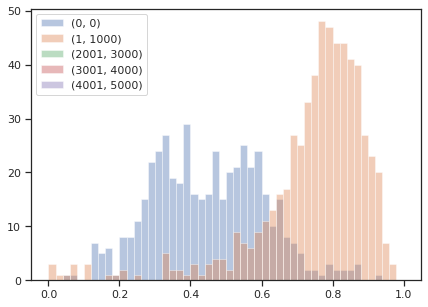

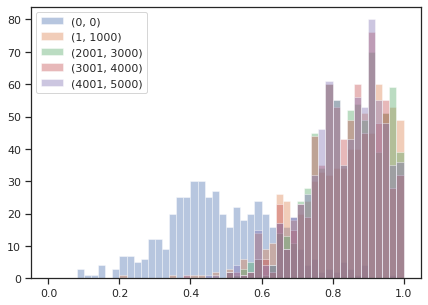

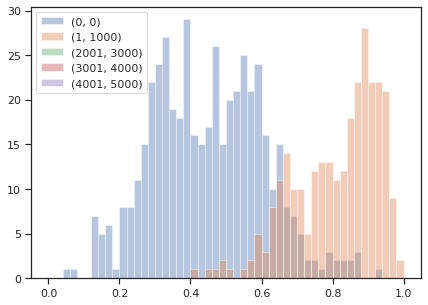

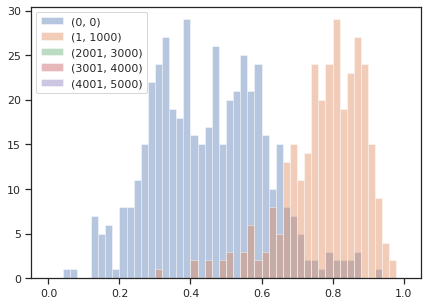

In [8]:
from bbomol.postprocessing.plot import plot_property_distribution_plot

for k in results_dict.keys():
    display(HTML("<h2>" + labels_dict[k] + "</h2>"))
    plot_property_distribution_plot(results_dict_with_init_step, property="obj_value", exp_list_plot=[k],
                                    calls_ranges=[(0, 0), (1, 1000), (2001, 3000), (3001, 4000), (4001, 5000)],
                                    bins_range=(0,1))

### SAScore distribution

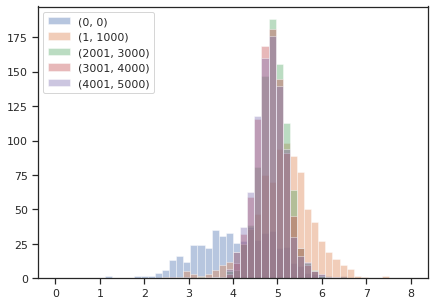

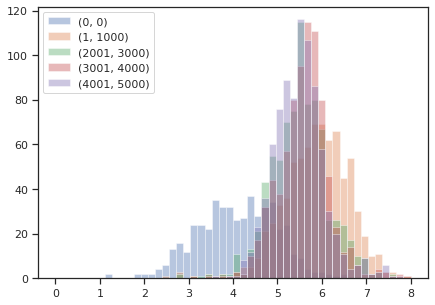

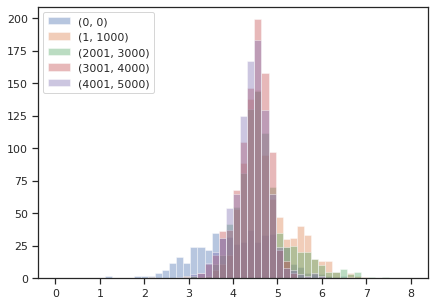

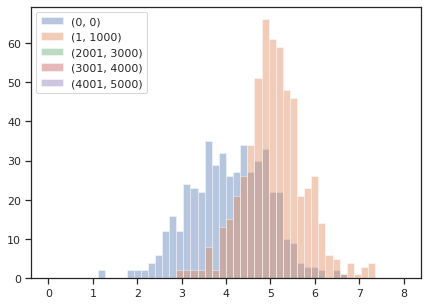

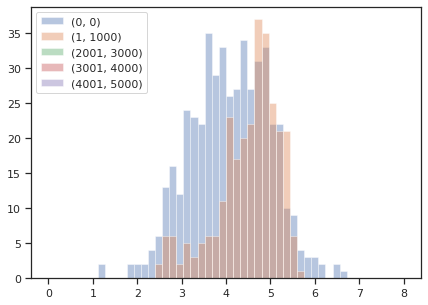

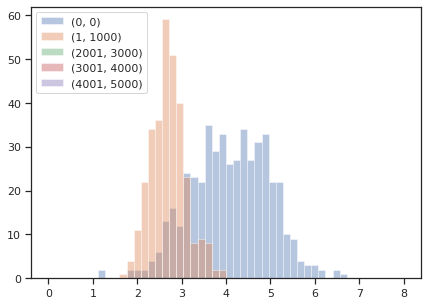

In [9]:
for k in results_dict.keys():
    display(HTML("<h2>" + labels_dict[k] + "</h2>"))
    plot_property_distribution_plot(results_dict_with_init_step, property=SAScoreEvaluationStrategy(), 
                                    exp_list_plot=[k], 
                                    calls_ranges=[(0, 0), (1, 1000), (2001, 3000), (3001, 4000), (4001, 5000)],
                                    bins_range=(0,8))

### Best solution so far (objective function)

In [10]:
from bbomol.postprocessing.plot import plot_best_so_far

plot_best_so_far(results_dict)

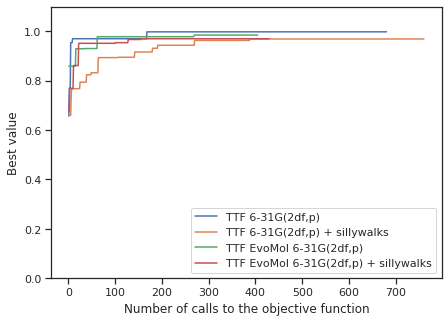

In [11]:
plot_best_so_far(results_dict, exp_list_plot=["TTF 6-31G(2df,p)", "TTF 6-31G(2df,p) + sillywalks",
                                              "TTF EvoMol 6-31G(2df,p)", "TTF EvoMol 6-31G(2df,p) + sillywalks"],
                 ylim=(0,1.1))